In [19]:
import matplotlib.pyplot as plt
import numpy as np
from lteanalysis import LTEAnalysis

In [14]:
# ----- input -----
# for LTE calculation
line  = 'c18o'
Xconv = 1e-7
delv  = 0.5 # km/s
ilines = [3,2] # Ju
Ncols = np.array([5.e16, 5.9e16, 5.e17]) # cm^-2  
Texes = np.array([5, 18, 22, 30]) # K

# Initiate Model

lte_model = LTEAnalysis()
lte_model.read_lamda_moldata(line)

In [20]:
def cost_function(T, N, X, Y, model):

    # print("printing params", params)
    N = N

    T = T

    X_predicted = model.get_intensity(line = 'c18o', Ju = 3, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 6
    Y_predicted = model.get_intensity(line = 'c18o', Ju = 2, Ncol = N, Tex = T, delv = 0.5, Xconv = 1.e-7) # band 7

    print(f"For T = {T}, N = {N:.2e}")
    print(f"Tb6 = {X_predicted}, Tb6 {Y_predicted}")


    error = (X_predicted - X)**2 + (Y_predicted - Y)**2

    #print(np.shape(error))
    return error

In [16]:
T = np.linspace(0.1, 100, 10)
lg_N = np.linspace(-20,-10,10)

tt, n = np.meshgrid(T,10**(lg_N))
print(T)
print(10**(lg_N))

[  0.1  11.2  22.3  33.4  44.5  55.6  66.7  77.8  88.9 100. ]
[1.00000000e-20 1.29154967e-19 1.66810054e-18 2.15443469e-17
 2.78255940e-16 3.59381366e-15 4.64158883e-14 5.99484250e-13
 7.74263683e-12 1.00000000e-10]


In [17]:
Z = np.zeros((len(T), len(lg_N)))

for i in range(len(T)):
    print(T[i])
    for j in range(len(lg_N)):
        print(lg_N[i])
        Z[i, j] = cost_function(T[i], 10**(lg_N[j]), X = 10.1, Y = 8.6, model = lte_model)


0.1
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
-20.0
11.200000000000001
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
-18.88888888888889
22.300000000000004
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
-17.77777777777778
33.400000000000006
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
-16.666666666666668
44.50000000000001
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
-15.555555555555555
55.60000000000001
-14.444444444444445
-14.444444444444445
-14.444444444444445
-14

In [18]:
print(Z)

[[175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]
 [175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97 175.97]]


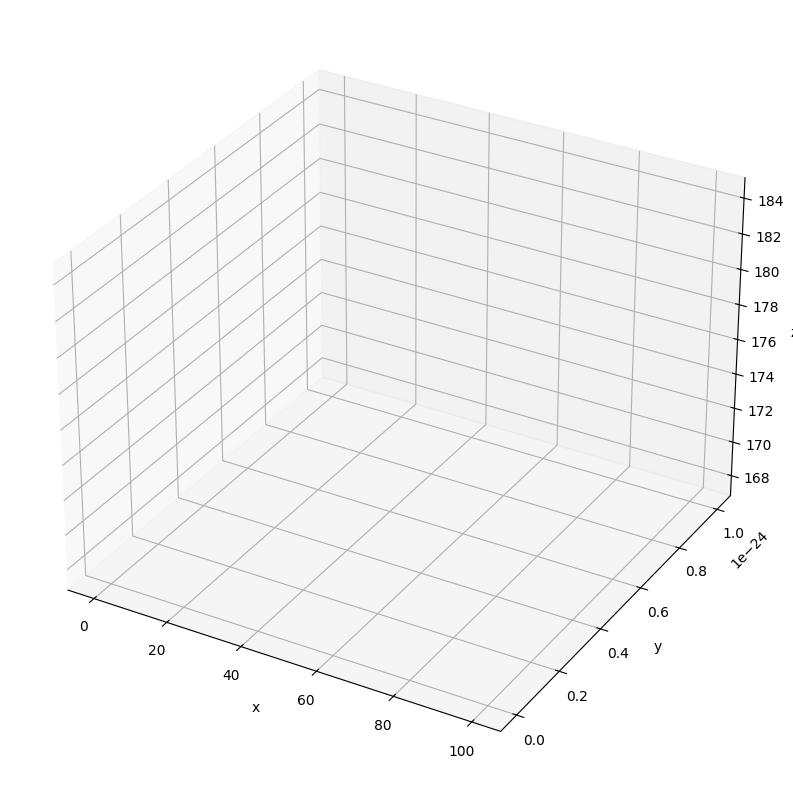

In [46]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.contour3D(tt, n, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()